In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df_admin = pd.read_csv("pseudon_tbladmin.csv")
df_headcircumf = pd.read_csv("pseudon_tblheadcircumf.csv")
df_height = pd.read_csv("pseudon_tblheight.csv")
df_weight = pd.read_csv("pseudon_tblweight.csv")

In [3]:
print(df_admin.isnull().sum())
print(df_admin.dtypes)
print(df_admin.shape)
df_admin.head()

patnr         0
gebdat        0
sex           0
verstorben    0
fallnr        0
fallart       0
eindat        0
ausdat        0
dtype: int64
patnr          int64
gebdat        object
sex           object
verstorben    object
fallnr         int64
fallart       object
eindat        object
ausdat        object
dtype: object
(17600, 8)


,patnr,gebdat,sex,verstorben,fallnr,fallart,eindat,ausdat
0,0,06/02/2004 00:00,M,N,0,A,17/03/2004 14:00,31/12/2005 23:59
1,0,06/02/2004 00:00,M,N,1,A,21/03/2004 09:16,31/12/2004 23:59
2,1,18/08/2004 00:00,M,N,2,A,17/09/2004 14:30,31/12/2005 23:59
3,2,11/09/2004 00:00,M,N,3,A,15/09/2004 16:00,31/12/2005 23:59
4,3,22/06/2004 00:00,M,N,4,A,22/09/2004 10:30,31/12/2005 23:59


In [4]:
print(df_headcircumf.isnull().sum())
print(df_headcircumf.dtypes)
print(df_headcircumf.shape)
df_headcircumf.head()

patnr        0
fallnr       0
startdat     0
val          0
unit         0
body_site    0
dtype: int64
patnr          int64
fallnr         int64
startdat      object
val          float64
unit          object
body_site     object
dtype: object
(2012, 6)


,patnr,fallnr,startdat,val,unit,body_site
0,676,10901,2023-05-06 08:28:00,51.5,cm,Kopf
1,1292,11944,2023-05-16 16:03:00,57.0,cm,Kopf
2,164,11956,2023-05-17 16:08:00,53.0,cm,Kopf
3,450,12199,2023-05-24 08:39:00,53.0,cm,Kopf
4,2102,17119,2023-05-30 00:00:00,28.0,cm,Kopf


In [5]:
print(df_height.isnull().sum())
print(df_height.dtypes)
print(df_height.shape)
df_height.head()

patnr           0
fallnr          0
startdat        0
height_value    1
height_unit     0
dtype: int64
patnr             int64
fallnr            int64
startdat         object
height_value    float64
height_unit      object
dtype: object
(4420, 5)


,patnr,fallnr,startdat,height_value,height_unit
0,1618,17475,2022-02-18 08:44:00,124.8,cm
1,2040,15597,2022-02-18 11:30:00,47.0,cm
2,306,17476,2022-02-18 13:43:00,168.5,cm
3,110,17478,2022-02-18 14:37:13,172.0,cm
4,1819,17477,2022-02-18 14:43:00,99.6,cm


In [6]:
print(df_weight.isnull().sum())
print(df_weight.dtypes)
print(df_weight.shape)
df_weight.head()

patnr            0
fallnr           0
startdat         0
weight_value    15
weight_unit     15
dtype: int64
patnr             int64
fallnr            int64
startdat         object
weight_value    float64
weight_unit      object
dtype: object
(9218, 5)


,patnr,fallnr,startdat,weight_value,weight_unit
0,14,16762,2023-06-06 15:37:00,54.6,kg
1,14,16762,2022-11-08 10:42:00,51.2,kg
2,0,16963,2022-03-21 08:21:00,55.0,kg
3,0,16963,2022-02-15 16:12:00,54.8,kg
4,0,16963,2022-10-18 08:41:00,54.2,kg


In [7]:
df_measures = pd.merge(df_headcircumf, pd.merge(df_height, df_weight, on=["patnr", "fallnr", "startdat"], how="outer"),\
                       on=["patnr", "fallnr", "startdat"], how="outer")
df_measures

,patnr,fallnr,startdat,val,unit,body_site,height_value,height_unit,weight_value,weight_unit
0,676,10901,2023-05-06 08:28:00,51.5,cm,Kopf,NaN,NaN,NaN,NaN
1,1292,11944,2023-05-16 16:03:00,57.0,cm,Kopf,153.0,cm,68.8,kg
2,164,11956,2023-05-17 16:08:00,53.0,cm,Kopf,139.2,cm,33.0,kg
3,450,12199,2023-05-24 08:39:00,53.0,cm,Kopf,138.2,cm,27.9,kg
4,2102,17119,2023-05-30 00:00:00,28.0,cm,Kopf,39.5,cm,1345.0,g
...,...,...,...,...,...,...,...,...,...,...
10446,1903,17245,2023-09-28 10:50:00,NaN,NaN,NaN,NaN,NaN,6400.0,g
10447,1903,14035,2023-06-23 15:10:00,NaN,NaN,NaN,NaN,NaN,3590.0,g
10448,1895,13948,2023-06-25 09:26:00,NaN,NaN,NaN,NaN,NaN,9.4,kg
10449,2014,16349,2023-06-25 15:43:00,NaN,NaN,NaN,NaN,NaN,4560.0,g


In [8]:
df_merged = pd.merge(df_admin, df_measures, on=["patnr", "fallnr"], how="outer")
df_merged

,patnr,gebdat,sex,verstorben,fallnr,fallart,eindat,ausdat,startdat,val,unit,body_site,height_value,height_unit,weight_value,weight_unit
0,0,06/02/2004 00:00,M,N,0,A,17/03/2004 14:00,31/12/2005 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,06/02/2004 00:00,M,N,1,A,21/03/2004 09:16,31/12/2004 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,18/08/2004 00:00,M,N,2,A,17/09/2004 14:30,31/12/2005 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,11/09/2004 00:00,M,N,3,A,15/09/2004 16:00,31/12/2005 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,22/06/2004 00:00,M,N,4,A,22/09/2004 10:30,31/12/2005 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22251,14,17/04/2003 00:00,W,N,17595,A,25/11/2003 23:12,31/12/2004 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22252,0,06/02/2004 00:00,M,N,17596,A,17/03/2004 13:47,31/12/2005 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22253,396,27/02/2013 00:00,M,N,17597,A,21/09/2023 14:45,01/01/3000 00:00,2023-09-21 14:37:00,NaN,NaN,NaN,147.5,cm,36.4,kg
22254,155,24/04/2010 00:00,W,N,17598,A,14/12/2022 14:00,01/01/3000 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
names_dict = {"patnr": "patientNumber", "gebdat": "dateOfBirth", "verstorben":"deceased", "fallnr": "caseNumber", "fallart": "caseDoctor", "eindat": "entryDate",\
             "ausdat": "exitDate", "startdat": "dateOfMeasure"}
df_merged = df_merged.rename(columns=names_dict)
df_merged

,patientNumber,dateOfBirth,sex,deceased,caseNumber,caseDoctor,entryDate,exitDate,dateOfMeasure,val,unit,body_site,height_value,height_unit,weight_value,weight_unit
0,0,06/02/2004 00:00,M,N,0,A,17/03/2004 14:00,31/12/2005 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,06/02/2004 00:00,M,N,1,A,21/03/2004 09:16,31/12/2004 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,18/08/2004 00:00,M,N,2,A,17/09/2004 14:30,31/12/2005 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,11/09/2004 00:00,M,N,3,A,15/09/2004 16:00,31/12/2005 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,22/06/2004 00:00,M,N,4,A,22/09/2004 10:30,31/12/2005 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22251,14,17/04/2003 00:00,W,N,17595,A,25/11/2003 23:12,31/12/2004 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22252,0,06/02/2004 00:00,M,N,17596,A,17/03/2004 13:47,31/12/2005 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22253,396,27/02/2013 00:00,M,N,17597,A,21/09/2023 14:45,01/01/3000 00:00,2023-09-21 14:37:00,NaN,NaN,NaN,147.5,cm,36.4,kg
22254,155,24/04/2010 00:00,W,N,17598,A,14/12/2022 14:00,01/01/3000 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print(df_merged["unit"].value_counts())
print(df_merged["height_unit"].value_counts())
print(df_merged["weight_unit"].value_counts())

cm    2148
Name: unit, dtype: int64
cm    4564
Name: height_unit, dtype: int64
kg    8213
g     1125
Name: weight_unit, dtype: int64


(1048, 16)


<AxesSubplot:xlabel='weight_value'>

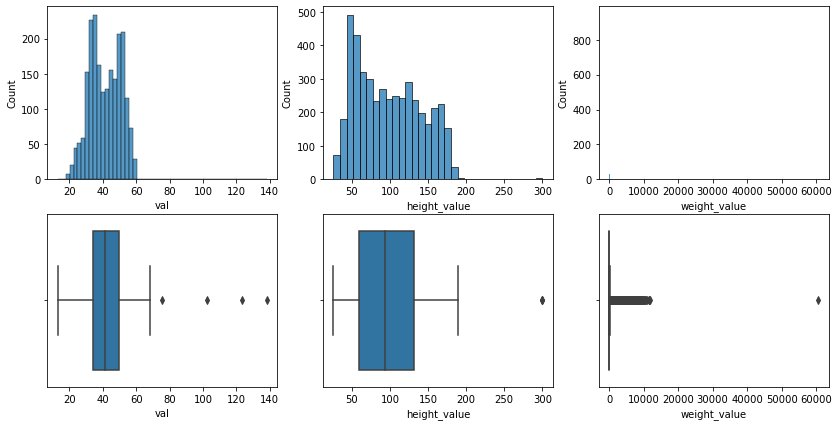

In [11]:
print(df_merged[df_merged["weight_value"]>1000].shape)
fig, axes = plt.subplots(2, 3, figsize=(14,7))
sns.histplot(data=df_merged, x="val", ax=axes[0, 0])
sns.histplot(data=df_merged, x="height_value", ax=axes[0, 1])
sns.histplot(data=df_merged, x="weight_value", ax=axes[0, 2])
sns.boxplot(data=df_merged, x="val", ax=axes[1, 0])
sns.boxplot(data=df_merged, x="height_value", ax=axes[1, 1])
sns.boxplot(data=df_merged, x="weight_value", ax=axes[1, 2])

In [12]:
df_merged[["weight_value", "weight_unit"]] = df_merged[["weight_value", "weight_unit"]].apply(lambda x: (x[0]/1000, "kg") if x[1]=="g" else x, axis=1)

In [13]:
print(df_merged["unit"].value_counts())
print(df_merged["height_unit"].value_counts())
print(df_merged["weight_unit"].value_counts())

cm    2148
Name: unit, dtype: int64
cm    4564
Name: height_unit, dtype: int64
kg    9338
Name: weight_unit, dtype: int64


(7, 16)


<AxesSubplot:xlabel='weight_value'>

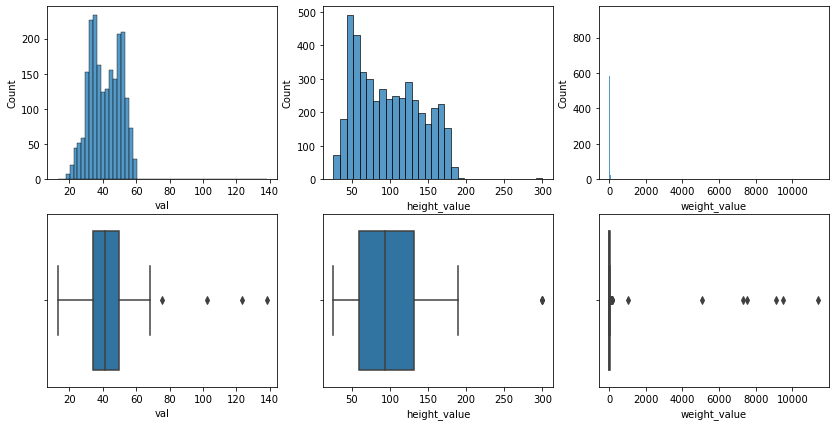

In [14]:
print(df_merged[df_merged["weight_value"]>1000].shape)
fig, axes = plt.subplots(2, 3, figsize=(14,7))
sns.histplot(data=df_merged, x="val", ax=axes[0, 0])
sns.histplot(data=df_merged, x="height_value", ax=axes[0, 1])
sns.histplot(data=df_merged, x="weight_value", ax=axes[0, 2])
sns.boxplot(data=df_merged, x="val", ax=axes[1, 0])
sns.boxplot(data=df_merged, x="height_value", ax=axes[1, 1])
sns.boxplot(data=df_merged, x="weight_value", ax=axes[1, 2])

#### Some outliers seem to be there, might add a filtering step downstream in the analysis pipeline if needed

In [15]:
df_merged

,patientNumber,dateOfBirth,sex,deceased,caseNumber,caseDoctor,entryDate,exitDate,dateOfMeasure,val,unit,body_site,height_value,height_unit,weight_value,weight_unit
0,0,06/02/2004 00:00,M,N,0,A,17/03/2004 14:00,31/12/2005 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,06/02/2004 00:00,M,N,1,A,21/03/2004 09:16,31/12/2004 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,18/08/2004 00:00,M,N,2,A,17/09/2004 14:30,31/12/2005 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,11/09/2004 00:00,M,N,3,A,15/09/2004 16:00,31/12/2005 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,22/06/2004 00:00,M,N,4,A,22/09/2004 10:30,31/12/2005 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22251,14,17/04/2003 00:00,W,N,17595,A,25/11/2003 23:12,31/12/2004 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22252,0,06/02/2004 00:00,M,N,17596,A,17/03/2004 13:47,31/12/2005 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22253,396,27/02/2013 00:00,M,N,17597,A,21/09/2023 14:45,01/01/3000 00:00,2023-09-21 14:37:00,NaN,NaN,NaN,147.5,cm,36.4,kg
22254,155,24/04/2010 00:00,W,N,17598,A,14/12/2022 14:00,01/01/3000 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_merged2 = df_merged.copy()

In [17]:
df_merged2["dateOfBirth"] = pd.to_datetime(df_merged2["dateOfBirth"], format="%d/%m/%Y %H:%M", errors="coerce").dt.strftime("%Y-%m-%d %H:%M")
df_merged2["entryDate"] = pd.to_datetime(df_merged2["entryDate"], format="%d/%m/%Y %H:%M", errors="coerce").dt.strftime("%Y-%m-%d %H:%M")
df_merged2["exitDate"] = pd.to_datetime(df_merged2["exitDate"], format="%d/%m/%Y %H:%M", errors="coerce").dt.strftime("%Y-%m-%d %H:%M")
df_merged2["dateOfMeasure"] = pd.to_datetime(df_merged2["dateOfMeasure"], format="%Y-%m-%d %H:%M:%S", errors="coerce").dt.strftime("%Y-%m-%d %H:%M")

In [18]:
df_merged[df_merged2["dateOfBirth"].isnull()]

,patientNumber,dateOfBirth,sex,deceased,caseNumber,caseDoctor,entryDate,exitDate,dateOfMeasure,val,unit,body_site,height_value,height_unit,weight_value,weight_unit


In [19]:
df_merged[df_merged2["entryDate"].isnull()]

,patientNumber,dateOfBirth,sex,deceased,caseNumber,caseDoctor,entryDate,exitDate,dateOfMeasure,val,unit,body_site,height_value,height_unit,weight_value,weight_unit
7575,577,17/08/2015 00:00,M,N,7048,S,31/12/9999 07:00,01/01/3000 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22104,283,13/09/2011 00:00,M,N,17480,S,31/12/9999 19:00,01/01/3000 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_merged[df_merged2["exitDate"].isnull()]

,patientNumber,dateOfBirth,sex,deceased,caseNumber,caseDoctor,entryDate,exitDate,dateOfMeasure,val,unit,body_site,height_value,height_unit,weight_value,weight_unit
15,10,28/02/2005 00:00,M,N,15,A,27/06/2005 22:16,01/01/3000 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,28,12/09/2004 00:00,M,N,74,A,01/03/2006 09:00,01/01/3000 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,11,16/06/2005 00:00,M,N,76,A,07/02/2006 14:14,01/01/3000 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,20,03/01/2006 00:00,M,N,106,A,17/08/2006 14:00,01/01/3000 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,69,29/10/2004 00:00,M,N,186,S,30/08/2007 13:45,01/01/3000 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22220,459,02/11/2012 00:00,M,N,17573,A,07/03/2023 14:00,01/01/3000 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22228,1254,24/06/2019 00:00,M,N,17578,A,06/02/2023 10:47,01/01/3000 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22253,396,27/02/2013 00:00,M,N,17597,A,21/09/2023 14:45,01/01/3000 00:00,2023-09-21 14:37:00,NaN,NaN,NaN,147.5,cm,36.4,kg
22254,155,24/04/2010 00:00,W,N,17598,A,14/12/2022 14:00,01/01/3000 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_merged[df_merged2["dateOfMeasure"].isnull()]

,patientNumber,dateOfBirth,sex,deceased,caseNumber,caseDoctor,entryDate,exitDate,dateOfMeasure,val,unit,body_site,height_value,height_unit,weight_value,weight_unit
0,0,06/02/2004 00:00,M,N,0,A,17/03/2004 14:00,31/12/2005 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,06/02/2004 00:00,M,N,1,A,21/03/2004 09:16,31/12/2004 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,18/08/2004 00:00,M,N,2,A,17/09/2004 14:30,31/12/2005 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,11/09/2004 00:00,M,N,3,A,15/09/2004 16:00,31/12/2005 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,22/06/2004 00:00,M,N,4,A,22/09/2004 10:30,31/12/2005 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22244,1553,05/03/2022 00:00,M,N,17590,A,10/03/2022 10:28,11/03/2023 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22247,61,27/06/2007 00:00,W,N,17592,A,10/03/2022 10:53,11/03/2023 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22251,14,17/04/2003 00:00,W,N,17595,A,25/11/2003 23:12,31/12/2004 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22252,0,06/02/2004 00:00,M,N,17596,A,17/03/2004 13:47,31/12/2005 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_merged2

,patientNumber,dateOfBirth,sex,deceased,caseNumber,caseDoctor,entryDate,exitDate,dateOfMeasure,val,unit,body_site,height_value,height_unit,weight_value,weight_unit
0,0,2004-02-06 00:00,M,N,0,A,2004-03-17 14:00,2005-12-31 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,2004-02-06 00:00,M,N,1,A,2004-03-21 09:16,2004-12-31 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2004-08-18 00:00,M,N,2,A,2004-09-17 14:30,2005-12-31 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2004-09-11 00:00,M,N,3,A,2004-09-15 16:00,2005-12-31 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,2004-06-22 00:00,M,N,4,A,2004-09-22 10:30,2005-12-31 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22251,14,2003-04-17 00:00,W,N,17595,A,2003-11-25 23:12,2004-12-31 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22252,0,2004-02-06 00:00,M,N,17596,A,2004-03-17 13:47,2005-12-31 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22253,396,2013-02-27 00:00,M,N,17597,A,2023-09-21 14:45,NaN,2023-09-21 14:37,NaN,NaN,NaN,147.5,cm,36.4,kg
22254,155,2010-04-24 00:00,W,N,17598,A,2022-12-14 14:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
print(df_merged2["sex"].isnull().sum())
print(df_merged2["sex"].value_counts())
df_merged2["sex"] = df_merged2["sex"].apply(lambda x: "Man" if x=="M" else ("Woman" if x=="W"else np.nan))
print(df_merged2["sex"].isnull().sum())
print(df_merged2["sex"].value_counts())

0
M    12186
W    10070
Name: sex, dtype: int64
0
Man      12186
Woman    10070
Name: sex, dtype: int64


In [26]:
df_merged2.sort_values("patientNumber")

,patientNumber,dateOfBirth,sex,deceased,caseNumber,caseDoctor,entryDate,exitDate,dateOfMeasure,val,unit,body_site,height_value,height_unit,weight_value,weight_unit
0,0,2004-02-06 00:00,Man,N,0,A,2004-03-17 14:00,2005-12-31 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12801,0,2004-02-06 00:00,Man,N,11188,A,2021-01-18 18:19,2021-02-28 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5452,0,2004-02-06 00:00,Man,N,5146,A,2017-10-04 14:30,2018-10-31 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13250,0,2004-02-06 00:00,Man,N,11512,A,2021-07-19 08:30,2022-07-20 23:59,2021-07-19 09:22,NaN,NaN,NaN,169.2,cm,50.50,kg
5245,0,2004-02-06 00:00,Man,N,4947,A,2018-01-08 15:00,2019-01-31 23:59,2019-01-29 15:40,NaN,NaN,NaN,152.1,cm,36.00,kg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22150,2159,2020-01-25 00:00,Woman,N,17514,A,2023-02-18 17:33,2023-02-25 23:59,2023-02-18 17:36,NaN,NaN,NaN,NaN,NaN,15.50,kg
22151,2160,2016-07-09 00:00,Man,N,17515,A,2023-02-18 14:29,2023-02-25 23:59,2023-02-18 14:30,NaN,NaN,NaN,NaN,NaN,25.00,kg
22153,2161,2019-04-28 00:00,Woman,N,17517,A,2023-02-20 01:12,2023-02-27 23:59,2023-02-20 01:15,NaN,NaN,NaN,NaN,NaN,14.00,kg
22235,2162,2021-08-16 00:00,Man,N,17584,A,2022-03-09 16:30,2023-03-10 23:59,2022-07-04 13:38,NaN,NaN,NaN,NaN,NaN,10.00,kg
